# Homework_2022_03_07

<font color=ff0000> 截止日期 3.31（周四） 23:59</font>

### Exercise 1 Pandas基础练习(4')

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data = {
    'age': [24, 53, 23, 24, 33, 42, 57, 57, 36, 29, 53, 39],
    'gender': ['M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F'],
    'occupation': ['technician', 'other', 'writer', 'technician', 'technician', 'executive', 'administrator', 'administrator', 'administrator', 'student', 'lawyer', 'other'],
    'zip_code': ['85711', '94043', '32067', '43537', '15213', '98101', '91344', '91344', '05201', '01002', '90703', '30329']
}

1.1 创建一组从1开始递增的id，作为行索引，由data生成一个DataFrame(1')：

In [16]:
# TODO
res = pd.DataFrame(data)
print(res)

    age gender     occupation zip_code
0    24      M     technician    85711
1    53      F          other    94043
2    23      M         writer    32067
3    24      M     technician    43537
4    33      F     technician    15213
5    42      M      executive    98101
6    57      M  administrator    91344
7    57      M  administrator    91344
8    36      M  administrator    05201
9    29      M        student    01002
10   53      M         lawyer    90703
11   39      F          other    30329


1.2 删除DataFrame中重复的行（保留一行），再删除所有occupation为"other"的行(0.5'):

In [19]:
# TODO
res1 = res.drop_duplicates()
print(res1)
print('--------------------------------------')
res2 = res1.drop(res1[res1['occupation'] == 'other'].index)
print(res2)

    age gender     occupation zip_code
0    24      M     technician    85711
1    53      F          other    94043
2    23      M         writer    32067
3    24      M     technician    43537
4    33      F     technician    15213
5    42      M      executive    98101
6    57      M  administrator    91344
8    36      M  administrator    05201
9    29      M        student    01002
10   53      M         lawyer    90703
11   39      F          other    30329
--------------------------------------
    age gender     occupation zip_code
0    24      M     technician    85711
2    23      M         writer    32067
3    24      M     technician    43537
4    33      F     technician    15213
5    42      M      executive    98101
6    57      M  administrator    91344
8    36      M  administrator    05201
9    29      M        student    01002
10   53      M         lawyer    90703


1.3 以两种方式访问DataFrame的第一行(0.5')：

In [25]:
# TODO
row_1 = res.iloc[0]
print(row_1)
print('----------------------------------')
row_2 = res[0:1]
print(row_2)

age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 0, dtype: object
----------------------------------
   age gender  occupation zip_code
0   24      M  technician    85711


1.4 以两种方式访问DataFrame的"occupation"列(0.5')：

In [30]:
# TODO
col_1 = res['occupation']
print(col_1)
print('-------------------------------')
col_2 = res.occupation
print(col_2)

0        technician
1             other
2            writer
3        technician
4        technician
5         executive
6     administrator
7     administrator
8     administrator
9           student
10           lawyer
11            other
Name: occupation, dtype: object
-------------------------------
0        technician
1             other
2            writer
3        technician
4        technician
5         executive
6     administrator
7     administrator
8     administrator
9           student
10           lawyer
11            other
Name: occupation, dtype: object


1.5 打印出DataFrame中出现次数最多的职业名称(0.5')：

In [34]:
# TODO
most_occ = res1['occupation'].value_counts()
# most_occ是一个series
print(most_occ.index[0])

technician


1.6 将data_2转换成DataFrame，与上一个DataFrame按照"zip_code"这一列合并，按两种合并方式：

1.合并后结果保留两个DataFrame的并集(0.5')；
2.合并后只保留data_2的所有数据(0.5')。

In [39]:
data_2 = {
    'zip_code': ['85711', '94043', '15213', '98101', '30329'],
    'name': ['Alan', 'Alice', 'Abigail', 'Bob', 'Dave']
}
df2 = pd.DataFrame(data_2)

# TODO
# 1.
bing_res = pd.merge(res1, df2, on='zip_code', how='outer')
print(bing_res)
print('-----------------------------------------------')
# 2.
df2_res = pd.merge(res1, df2, on='zip_code', how='inner')
print(df2_res)

    age gender     occupation zip_code     name
0    24      M     technician    85711     Alan
1    53      F          other    94043    Alice
2    23      M         writer    32067      NaN
3    24      M     technician    43537      NaN
4    33      F     technician    15213  Abigail
5    42      M      executive    98101      Bob
6    57      M  administrator    91344      NaN
7    36      M  administrator    05201      NaN
8    29      M        student    01002      NaN
9    53      M         lawyer    90703      NaN
10   39      F          other    30329     Dave
-----------------------------------------------
   age gender  occupation zip_code     name
0   24      M  technician    85711     Alan
1   53      F       other    94043    Alice
2   33      F  technician    15213  Abigail
3   42      M   executive    98101      Bob
4   39      F       other    30329     Dave


### Exercise 2 Pandas数据分析(6')

本部分数据基于2022年3月的COVID-19疫情数据进行数据分析。

在此致谢数据来源：https://github.com/BlankerL/DXY-COVID-19-Data ，并祝愿疫情的影响早日结束。

2.1 读取COVID-19_March.csv，通过shape和info()查看数据基本信息(0.5')。

In [2]:
import pandas as pd
#TODO
ori_df = pd.read_csv('COVID19_March.csv')
print(ori_df.shape)
print(ori_df.info())
print(ori_df[0:1])

(34021, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34021 entries, 0 to 34020
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continentName            34021 non-null  object 
 1   continentEnglishName     34021 non-null  object 
 2   countryName              34021 non-null  object 
 3   countryEnglishName       31953 non-null  object 
 4   provinceName             34021 non-null  object 
 5   provinceEnglishName      31953 non-null  object 
 6   province_zipCode         34021 non-null  int64  
 7   province_confirmedCount  34021 non-null  int64  
 8   province_suspectedCount  34021 non-null  int64  
 9   province_curedCount      34021 non-null  int64  
 10  province_deadCount       34021 non-null  int64  
 11  cityName                 16252 non-null  object 
 12  cityEnglishName          15017 non-null  object 
 13  city_zipCode             16252 non-null  float64
 14  city_confi

2.2 从原表格的updateTime中提取最后更新时间，去除具体时间得到日期，并在原DataFrame中增加一列"Date"保存日期(0.5')。

In [3]:
#TODO
upd_t = ori_df['updateTime'].copy(deep='True')
for i in range(len(upd_t)):
    upd_t[i] = upd_t[i].split(' ')[0]
ori_df['Date'] = upd_t
print(ori_df.shape)
print(ori_df.info())
print(ori_df[0:1])

(34021, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34021 entries, 0 to 34020
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continentName            34021 non-null  object 
 1   continentEnglishName     34021 non-null  object 
 2   countryName              34021 non-null  object 
 3   countryEnglishName       31953 non-null  object 
 4   provinceName             34021 non-null  object 
 5   provinceEnglishName      31953 non-null  object 
 6   province_zipCode         34021 non-null  int64  
 7   province_confirmedCount  34021 non-null  int64  
 8   province_suspectedCount  34021 non-null  int64  
 9   province_curedCount      34021 non-null  int64  
 10  province_deadCount       34021 non-null  int64  
 11  cityName                 16252 non-null  object 
 12  cityEnglishName          15017 non-null  object 
 13  city_zipCode             16252 non-null  float64
 14  city_confi

2.3 这里给出的数据由每天循环爬取得到，因此同一地区同一日的数据可能会有多项纪录，
但我们只需保存每一天同一个地区（精确到城市）最后一条记录。
请对数据进行筛选，按provinceName, cityName, Date三列为标准去重，
并将DataFrame按时间从早到晚的顺序排序(1')。

In [5]:
#TODO
import numpy as np
from natsort import index_natsorted
# def my_sort(input_s):
#     tmp = input_s.copy(deep='True')
#     for i in range(len(tmp)):
#         tmp[i] = int(tmp[i].split('/')[2])
#     tmp = tmp.sort_values()
#     print(tmp.index)
#
#     return tmp.index

res_df1 = ori_df.drop_duplicates(subset=['provinceName', 'cityName', 'Date'], ignore_index=True)
res_df1 = res_df1.sort_values(by='Date', key=lambda x: np.argsort(index_natsorted(res_df1['Date'])))
print(res_df1[0:1])

      continentName continentEnglishName countryName  \
14796           北美洲        North America          美国   

             countryEnglishName provinceName       provinceEnglishName  \
14796  United States of America           美国  United States of America   

       province_zipCode  province_confirmedCount  province_suspectedCount  \
14796            971002                 79045217                        0   

       province_curedCount  province_deadCount cityName cityEnglishName  \
14796             53500262              950524      NaN             NaN   

       city_zipCode  city_confirmedCount  city_suspectedCount  \
14796           NaN                  NaN                  NaN   

       city_curedCount  city_deadCount      updateTime      Date  
14796              NaN             NaN  2022/3/1 19:01  2022/3/1  


2.4 新建两个DataFrame，分别包含筛选后国内的数据和国外的数据，便于后面分别统计(0.5')。

In [6]:
#TODO
national_df = res_df1[res_df1['countryName']=='中国'].copy(deep='True')
international_df = res_df1[res_df1['countryName']!='中国'].copy(deep='True')

print(national_df.shape)
print(international_df.shape)

(10264, 20)
(5136, 20)


2.5 对于境外的每一个国家，请用记录中最后一天的病例数(province_confirmed)减去第一天的病例数，
再除以之间间隔的天数，
以此统计日平均新增情况，并打印全球平均日新增的前十名(1')。

提示：可以使用groupby&apply等方法；请注意，记录的第一天与最后一天未必是3.1和3.27。
参考阅读：https://zhuanlan.zhihu.com/p/101284491

In [11]:
#TODO
def cal_avg(df):
    sums=df[['province_confirmedCount','Date']].groupby('Date').agg('sum')
    sums=sums.sort_values(by='Date',axis=0,key=lambda x: np.argsort(index_natsorted(sums.index)))
    l=int(sums.index[-1].split('/')[-1])-int(sums.index[0].split('/')[-1])
    ret_val = (sums.iloc[-1]-sums.iloc[0])/l
    return ret_val

mean_res = international_df.groupby('countryName')\
    .apply(cal_avg)
mean_res = mean_res.sort_values(by='province_confirmedCount',
    key=lambda x: np.argsort(index_natsorted(mean_res.province_confirmedCount)),
                ascending=False)
print(mean_res[0:10])

             province_confirmedCount
countryName                         
韩国                     321663.653846
越南                     209240.269231
德国                     181072.500000
法国                      80409.961538
英国                      73145.961538
意大利                     56343.730769
荷兰                      56220.961538
日本                      51193.423077
俄罗斯                     50667.461538
巴西                      39729.807692


2.6 利用pandas的cut功能对境外的日平均新增情况进行分组，打印每个数量级区间内的国家数(0.5')。

In [13]:
#TODO
bin = [0, 10, 100, 1000, 1000, 10000, 100000, 1000000]
mean_res1 = mean_res.copy(deep='True')

cut_res = pd.value_counts(pd.cut(mean_res1['province_confirmedCount'], bin, duplicates='drop'))
print(cut_res)

(100, 1000]          49
(10, 100]            48
(0, 10]              44
(1000, 10000]        39
(10000, 100000]      24
(100000, 1000000]     3
Name: province_confirmedCount, dtype: int64


2.7 绘制3月以来吉林省每日新增的疫情曲线，以后一日减去前一日的确诊病例之差作为新增标准
(提示，差分操作在pandas中也有对应的方法)(1')。

<AxesSubplot:title={'center':'COVID19 confirmed cases in Jilin daily increase'}>

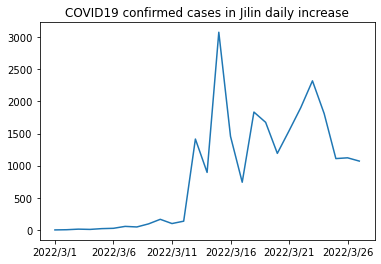

In [150]:
#TODO
jilin_df = national_df[national_df['provinceName']=='吉林省'].copy(deep='True')

jilin_data = {}

def my_apply(x):
    jilin_data[list(x['Date'].values)[0]] = \
        list(x['province_confirmedCount'].values)[0]
    return

cnt_res = jilin_df.groupby('Date')\
    .apply(my_apply)

jilin_s = pd.Series(jilin_data)
jilin_s = jilin_s.sort_index(key=lambda x: np.argsort(index_natsorted(jilin_s.index)))
jilin_s = jilin_s.diff()
jilin_s[0] = 0

jilin_s.plot(title='COVID19 confirmed cases in Jilin daily increase')

2.8 请绘制3月以来上海市每日新增的疫情曲线，在一张图上同时画出总新增与本土新增
（cityName中有境外输入条目，可以作为区分）(1')。

<AxesSubplot:title={'center':'COVID19 confirmed cases in Shanghai daily increase'}>

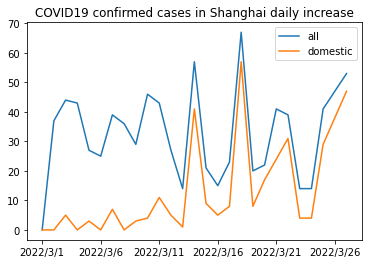

In [178]:
#TODO
sh_df_all = national_df[national_df['provinceName']=='上海市'].copy(deep='True')
# sh_df_domestic = sh_df_all[sh_df_all['cityName']!='境外输入'].copy(deep='True')
sh_df_out = sh_df_all[sh_df_all['cityName']=='境外输入'].copy(deep='True')

sh_data_all = {}
# sh_data_domestic = {}
sh_data_out = {}

def my_apply_1(x):
    sh_data_all[list(x['Date'].values)[0]] = \
        list(x['province_confirmedCount'].values)[0]
    return

# def my_apply_2(x):
#     sh_data_domestic[list(x['Date'].values)[0]] = \
#         list(x['province_confirmedCount'].values)[0]
#     return

def my_apply_3(x):
    sh_data_out[list(x['Date'].values)[0]] = \
        list(x['city_confirmedCount'].values)[0]
    return

sh_df_all.groupby('Date').apply(my_apply_1)
# sh_df_domestic.groupby('Date').apply(my_apply_2)
sh_df_out.groupby('Date').apply(my_apply_3)

sh_s_all = pd.Series(sh_data_all)
sh_s_all = sh_s_all.sort_index(key=lambda x: np.argsort(index_natsorted(sh_s_all.index)))
sh_s_all = sh_s_all.diff()
sh_s_all[0] = 0

# sh_s_domestic = pd.Series(sh_data_domestic)
# sh_s_domestic = sh_s_domestic.sort_index(key=lambda x: np.argsort(index_natsorted(sh_s_domestic.index)))
# sh_s_domestic = sh_s_domestic.diff()
# sh_s_domestic[0] = 0

sh_s_out = pd.Series(sh_data_out)
sh_s_out = sh_s_out.sort_index(key=lambda x: np.argsort(index_natsorted(sh_s_out.index)))
sh_s_out = sh_s_out.diff()
sh_s_out[0] = 0
sh_s_domestic = sh_s_all - sh_s_out

sh_s_all.plot(title='COVID19 confirmed cases in Shanghai daily increase', label='all', legend='True')
sh_s_domestic.plot(label='domestic', legend='True')

### 附加题 聚类方法比较及评价 (+2')
本题我们利用Minst数据集进行KMeans聚类方法的测试，并对聚类的效果进行评估。

In [4]:
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X = pd.read_csv('./train_X.csv') # 为了方便起见，这里只采用前6000个MNIST数据
y = pd.read_csv('./train_y.csv')
X, y = np.array(X), np.array(y)
print(X.shape)
print(y.shape)

(6000, 784)
(6000, 1)


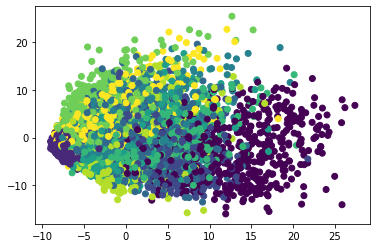

In [5]:
pca2d = PCA(n_components=2)
X_std = preprocessing.scale(X) # 数据标准化
X_2d = pca2d.fit_transform(X_std)# 数据降维至两维便于可视化
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)

3.1 请在原始的标准化数据X_std和降至二维的数据X_2d上分别进行KMeans聚类，
并对两种聚类结果进行可视化（以标签作为颜色，均只在二维可视化即可）
和纯度计算（参考PPT第四页的公式）。+1'

std_label
std purity: 0.5206666666666667


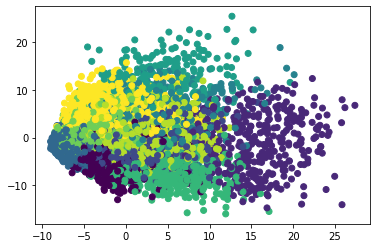

In [6]:
#TODO
from sklearn.cluster import KMeans

std_res = KMeans(n_clusters=10).fit(X_std)
std_label = std_res.labels_

res_2d = KMeans(n_clusters=10).fit(X_2d)
label_2d = res_2d.labels_

print('std_label')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=std_label)

std_cat, std_cnt = np.unique(np.array(std_label), return_counts=True)
P_std = 0
for i in range(10):
    # 枚举被分的类别
    max_cnt = 0
    for j in range(10):
        # 枚举原本的类别
        cnt = 0
        for k in range(len(std_label)):
            if std_label[k] == i and y[k] == j:
                cnt += 1
        if cnt > max_cnt:
            max_cnt = cnt
    P_std += (float(max_cnt) / float(std_cnt[i])) * (float(std_cnt[i]) / float(len(y)))
print(f'std purity: {P_std}')

2d_label
2d purity: 0.34266666666666673


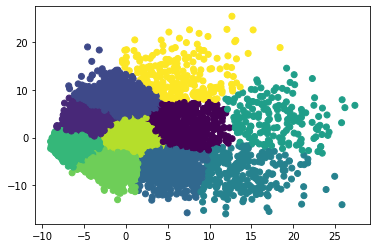

In [10]:
print('2d_label')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label_2d)

cat_2d, cnt_2d = np.unique(np.array(std_label), return_counts=True)
P_2d = 0
for i in range(10):
    # 枚举被分的类别
    max_cnt = 0
    for j in range(10):
        # 枚举原本的类别
        cnt = 0
        for k in range(len(label_2d)):
            if label_2d[k] == i and y[k] == j:
                cnt += 1
        if cnt > max_cnt:
            max_cnt = cnt
    P_2d += (float(max_cnt) / float(cnt_2d[i])) * (float(cnt_2d[i]) / float(len(y)))
print(f'2d purity: {P_2d}')

3.2 请用KM算法等方式实现聚类结果和原标签的最优匹配，并在此基础上计算两种结果的F值。+1'

参考阅读：

1. 匈牙利算法Wiki https://zh.wikipedia.org/wiki/%E5%8C%88%E7%89%99%E5%88%A9%E7%AE%97%E6%B3%95 
2. KM算法讲解 https://blog.csdn.net/sixdaycoder/article/details/47720471
3. KM算法python实现https://blog.csdn.net/weixin_39504758/article/details/120183504


In [11]:
#TODO
# 使用X_std的情况
from munkres import Munkres
from sklearn.metrics import f1_score
import copy
power_res = np.empty([10, 10], dtype=float)

for i in range(10):
    for j in range(10):
        cnt = 0
        for k in range(len(y)):
            if std_label[k] == i and y[k] == j:
                cnt += 1
        power_res[i][j] = float(cnt) / float(std_cnt[i])

m = Munkres()
KM_res = m.compute(power_res)

km_res = {}
for i in KM_res:
    tmp = list(i)
    km_res[tmp[0]] = tmp[1]

std_label_t = copy.deepcopy(std_label)
y_array = np.array(y).reshape([6000])

for i in range(len(std_label_t)):
    std_label_t[i] = km_res[std_label[i]]

F1 = f1_score(y_array, std_label_t, average='macro')
print(F1)

0.004191089039962452


In [13]:
# 使用X_2d的情况

from munkres import Munkres
from sklearn.metrics import f1_score
import copy
power_res2 = np.empty([10, 10], dtype=float)

for i in range(10):
    for j in range(10):
        cnt = 0
        for k in range(len(y)):
            if label_2d[k] == i and y[k] == j:
                cnt += 1
        power_res2[i][j] = float(cnt) / float(cnt_2d[i])

m2 = Munkres()
KM_res2 = m.compute(power_res)

km_res2 = {}
for i in KM_res2:
    tmp = list(i)
    km_res2[tmp[0]] = tmp[1]

d2_label_t = copy.deepcopy(label_2d)
y_array = np.array(y).reshape([6000])

for i in range(len(d2_label_t)):
    d2_label_t[i] = km_res2[label_2d[i]]

F1_2 = f1_score(y_array, d2_label_t, average='macro')
print(F1_2)


0.1124164154001523


In [14]:
import itertools
import numpy as np
from numpy import random
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import f1_score

res_std=KMeans(n_clusters=10).fit(X_std)


def hungary(task_matrix):
    b = task_matrix.copy()
    # 行和列减0
    for i in range(len(b)):
        row_min = np.min(b[i])
        for j in range(len(b[i])):
            b[i][j] -= row_min
    for i in range(len(b[0])):
        col_min = np.min(b[:, i])
        for j in range(len(b)):
            b[j][i] -= col_min
    line_count = 0
    # 线数目小于矩阵长度时，进行循环
    while (line_count < len(b)):
        line_count = 0
        row_zero_count = []
        col_zero_count = []
        for i in range(len(b)):
            row_zero_count.append(np.sum(b[i] == 0))
        for i in range(len(b[0])):
            col_zero_count.append((np.sum(b[:, i] == 0)))
        # 划线的顺序（分行或列）
        line_order = []
        row_or_col = []
        for i in range(len(b[0]), 0, -1):
            while (i in row_zero_count):
                line_order.append(row_zero_count.index(i))
                row_or_col.append(0)
                row_zero_count[row_zero_count.index(i)] = 0
            while (i in col_zero_count):
                line_order.append(col_zero_count.index(i))
                row_or_col.append(1)
                col_zero_count[col_zero_count.index(i)] = 0
        # 画线覆盖0，并得到行减最小值，列加最小值后的矩阵
        delete_count_of_row = []
        delete_count_of_rol = []
        row_and_col = [i for i in range(len(b))]
        for i in range(len(line_order)):
            if row_or_col[i] == 0:
                delete_count_of_row.append(line_order[i])
            else:
                delete_count_of_rol.append(line_order[i])
            c = np.delete(b, delete_count_of_row, axis=0)
            c = np.delete(c, delete_count_of_rol, axis=1)
            line_count = len(delete_count_of_row) + len(delete_count_of_rol)
            # 线数目等于矩阵长度时，跳出
            if line_count == len(b):
                break
            # 判断是否画线覆盖所有0，若覆盖，进行加减操作
            if 0 not in c:
                row_sub = list(set(row_and_col) - set(delete_count_of_row))
                min_value = np.min(c)
                for i in row_sub:
                    b[i] = b[i] - min_value
                for i in delete_count_of_rol:
                    b[:, i] = b[:, i] + min_value
                break
    row_ind, col_ind = linear_sum_assignment(b)
    return row_ind,col_ind

def get_task_matrix(pred,gold):
    assert pred.shape[0]==gold.shape[0]
    pred_labels,pred_cnt=np.unique(pred,return_counts=True)
    gold_labels,gold_cnt=np.unique(gold,return_counts=True)

    l_p=len(pred_labels)
    l_g=len(gold_labels)

    task_matrix=np.zeros((l_p,l_g))
    for i in range(l_p):
        i_gold=gold[pred==pred_labels[i]]
        for j in i_gold:
            task_matrix[i][j]-=1

    return task_matrix

def cal_f(pred,gold,row_ind,col_ind):
    assert len(row_ind)==len(col_ind)
    l=len(row_ind)

    t_p=np.zeros_like(pred)

    for i in range(l):
       t_p[pred==row_ind[i]]=col_ind[i]


    macro_f1=f1_score(gold,t_p,average='macro')

    return macro_f1

tm_std = get_task_matrix(res_std.labels_,y)
row_ind,col_ind=hungary(tm_std)
print("On X_std: %f " % cal_f(res_std.labels_,y,row_ind,col_ind))

tm_2d = get_task_matrix(res_2d.labels_,y)
row_ind,col_ind=hungary(tm_2d)
print("On X_2d: %f " % cal_f(res_2d.labels_,y,row_ind,col_ind))

On X_std: 0.473405 
On X_2d: 0.270949 
